In [1]:
import qiskit

In [2]:
qiskit.__qiskit_version__


{'qiskit-terra': '0.17.2', 'qiskit-aer': '0.8.2', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.12.3', 'qiskit-aqua': '0.9.1', 'qiskit': '0.25.4', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [3]:
from qiskit import IBMQ


In [4]:
IBMQ.save_account('55bf7fa8e028598287215d5bef69fdc6e5ef1e2c403f030f1ba109dc9a84c9550c4fce56ee2ef05663922e2472ef005d0a731a30ed6ea0e9cd0736b604f35a15')

configrc.store_credentials:WARNING:2021-05-10 20:49:49,173: Credentials already present. Set overwrite=True to overwrite.


In [5]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
from qiskit import QuantumCircuit

In [12]:
%matplotlib inline

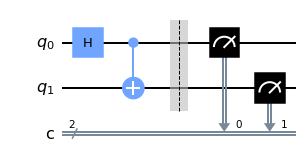

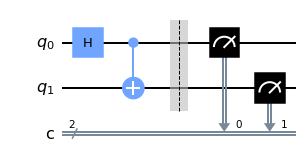

In [34]:

from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.barrier()
qc.measure([0,1],[0,1])
qc.draw(output = 'mpl')

In [27]:
qc.barrier()
qc.measure([0,1],[0,1])

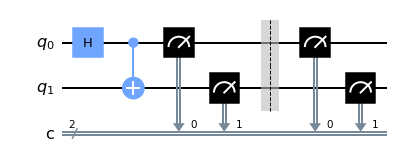

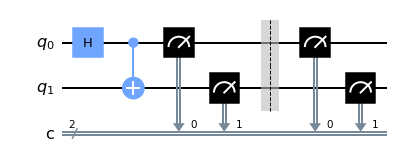

In [28]:
qc.draw(output = 'mpl')

In [35]:
from qiskit import Aer

In [37]:
from qiskit import execute
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc,backend = simulator).result()

In [39]:
from qiskit.tools.visualization import plot_histogram

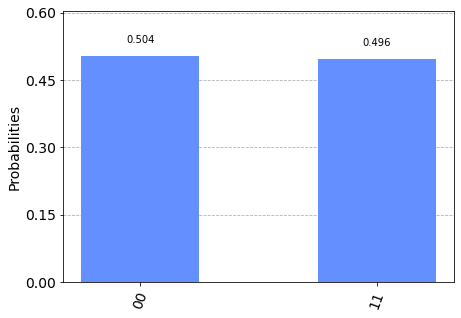

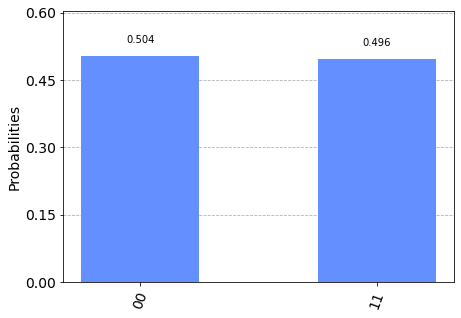

In [40]:
plot_histogram(result.get_counts())

In [41]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-05-10 21:25:53,496: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [42]:
provider = IBMQ.get_provider('ibm-q')

In [45]:
# Load our saved IBMQ accounts and get the least busy backend device with greater than or equal to (n+1) qubits
from qiskit.providers.ibmq import least_busy
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (2+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_16_melbourne


In [47]:
qcomp = provider.get_backend('ibmq_16_melbourne')

In [53]:
job = execute(qc,backend = qcomp,shots = 2048)

In [54]:
from qiskit.tools.monitor import job_monitor

In [55]:
job_monitor(job)

Job Status: job has successfully run


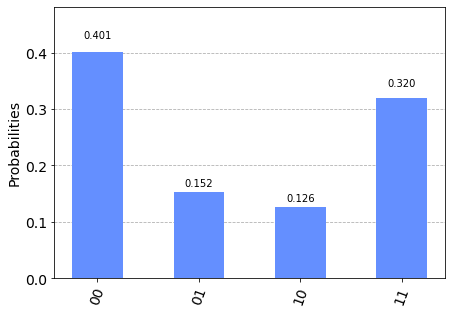

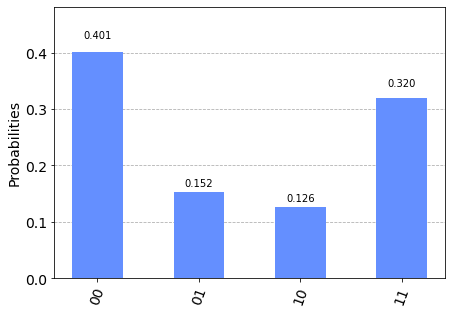

In [52]:
result = job.result()
plot_histogram(result.get_counts(qc))

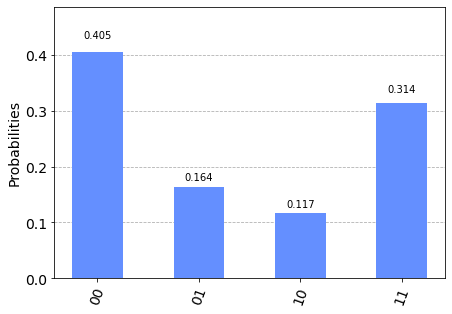

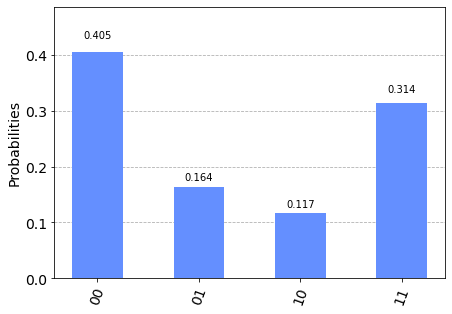

In [56]:
result = job.result()
plot_histogram(result.get_counts(qc))

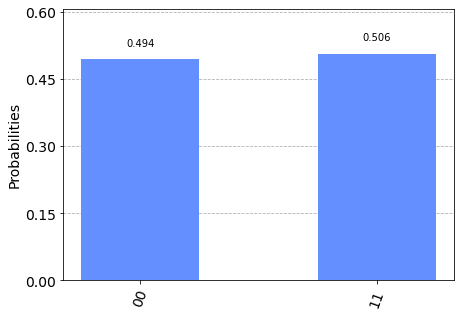

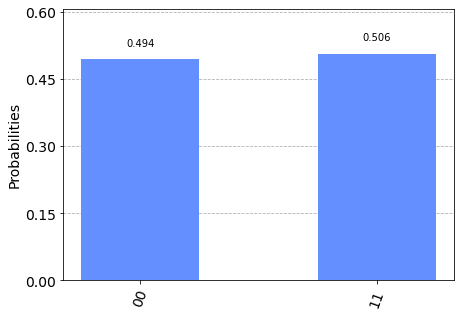

In [80]:
state_vector = Aer.get_backend('statevector_simulator')
arr = {'00':0,'11':0}
for i in range(1000):
    result = execute(qc,state_vector).result()
    d = result.get_counts()
    try:
        if d['00']:
            arr['00'] += 1
    except:
        arr['11'] += 1
plot_histogram(arr)

In [77]:
arr = {'00':1}
arr['00']

1